## COMP47750
## Machine Learning with Python
## Assignment 2
## Feature Engineering

#### Objective
The objective of this assignment is to assess the impact of feature engineering on a traffic volume prediction task. The data is available in the file metro_traffic_15_19.csv. This file is an extract from the UCI dataset here <link>.

The idea is to generate effective features for predicting traffic volume from data available a day in advance. You can assume that reasonable forecasts for the weather features are available a day in advance.



#### Task 1
##### 1.Load the dataset into a dataframe that can be used for predicting  traffic_volume a day in advance.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection

In [2]:
data = pd.read_csv("./metro_traffic_15_19.csv", index_col = None)
data = pd.DataFrame(data)
data.head()

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936


##### 2.Produce some plots at different time-scales to see if there is periodicity in the traffic volume.

Determine by time if the traffic flow is cyclical.
I will research the annual, monthly, daily, and hourly frequency of traffic flow.
The initial stage is organizing the data and separating the data time into Year, Month, day, and Time.

In [3]:
metro_date = data["date_time"].str.split(expand = True)  # split Date_ time to Date and Time
metro_data_split = data.loc[:,'traffic_volume'] # collect traffic volume to new data set
metro_data_split = pd.DataFrame(metro_data_split) # created Two-dimensional, size-mutable, potentially heterogeneous tabular data.
metro_data_split ["date"] = metro_date[0]
metro_data_split["time"] = metro_date[1]
metro_data_split.head()

,traffic_volume,date,time
0,737,2015-07-01,00:00:00
1,444,2015-07-01,01:00:00
2,347,2015-07-01,02:00:00
3,356,2015-07-01,03:00:00
4,936,2015-07-01,04:00:00


In [4]:
metro_data_year = metro_data_split # keep original data to future use
metro_data_year = metro_data_year.groupby(["date"]).mean()
# sort date by month and Day
metro_data_final = metro_data_year.reset_index()
metro_data_month_split = metro_data_final["date"].str.split(pat = "-", expand = True)

#megre all date in one dataset qaz
metro_data_final["year"] = metro_data_month_split[0]
metro_data_final["year-month"] = metro_data_month_split[0] + '-' + metro_data_month_split[1]
metro_data_final["month-day"] = metro_data_month_split[1]+ '-' + metro_data_month_split[2]
metro_data_final.head()

,date,traffic_volume,year,year-month,month-day
0,2015-07-01,3569.782609,2015,2015-07,07-01
1,2015-07-02,3584.791667,2015,2015-07,07-02
2,2015-07-03,2681.916667,2015,2015-07,07-03
3,2015-07-04,1767.102564,2015,2015-07,07-04
4,2015-07-05,2254.269231,2015,2015-07,07-05


Sort dataset by Year and draw figure

In [5]:
metro_data_final_year = metro_data_final
metro_data_final_year = metro_data_final_year.groupby(["year"]).mean()
metro_data_final_year.head()

,traffic_volume
year,
2015,3225.490254
2016,3199.299585
2017,3347.684415
2018,3299.691030


Draw Figure

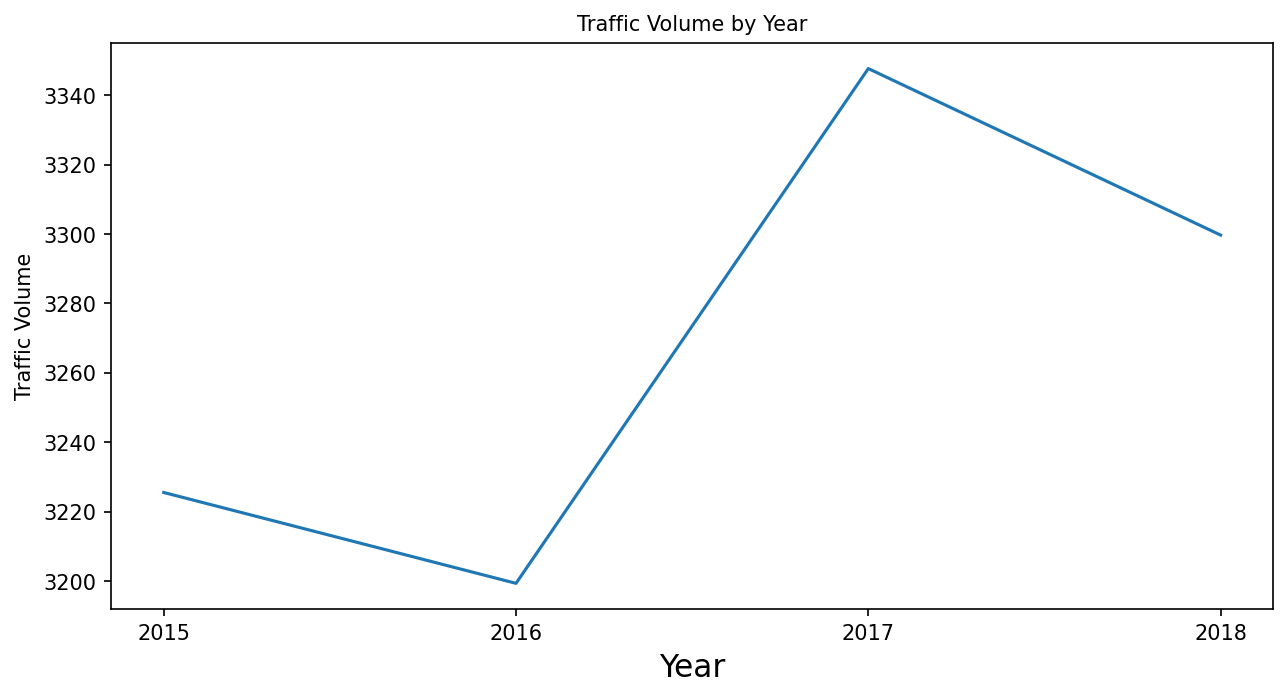

In [6]:
plt.figure( figsize=(10,5), dpi = 150)#figsize specifies the size of the image, dpi sets the sharpness of the image
plt.plot(metro_data_final_year)
plt.title("Traffic Volume by Year", fontsize = 10)  # set title
plt.xlabel ("Year" , fontsize = 15) # set x label name and font size
plt.ylabel ("Traffic Volume", fontsize = 10) # set Y label name and font size
plt.show()

After sorting by year, it is difficult to find a periodicity due to the small amount of
#
### Try Sort by Month and Draw Fig

In [7]:
metro_data_final_month = metro_data_final
metro_data_final_month = metro_data_final_month.groupby(["year-month"]).mean()
metro_data_final_month.head()

,traffic_volume
year-month,
2015-07,3197.446516
2015-08,3302.822426
2015-09,3303.734952
2015-10,3292.337596
2015-11,3105.254799


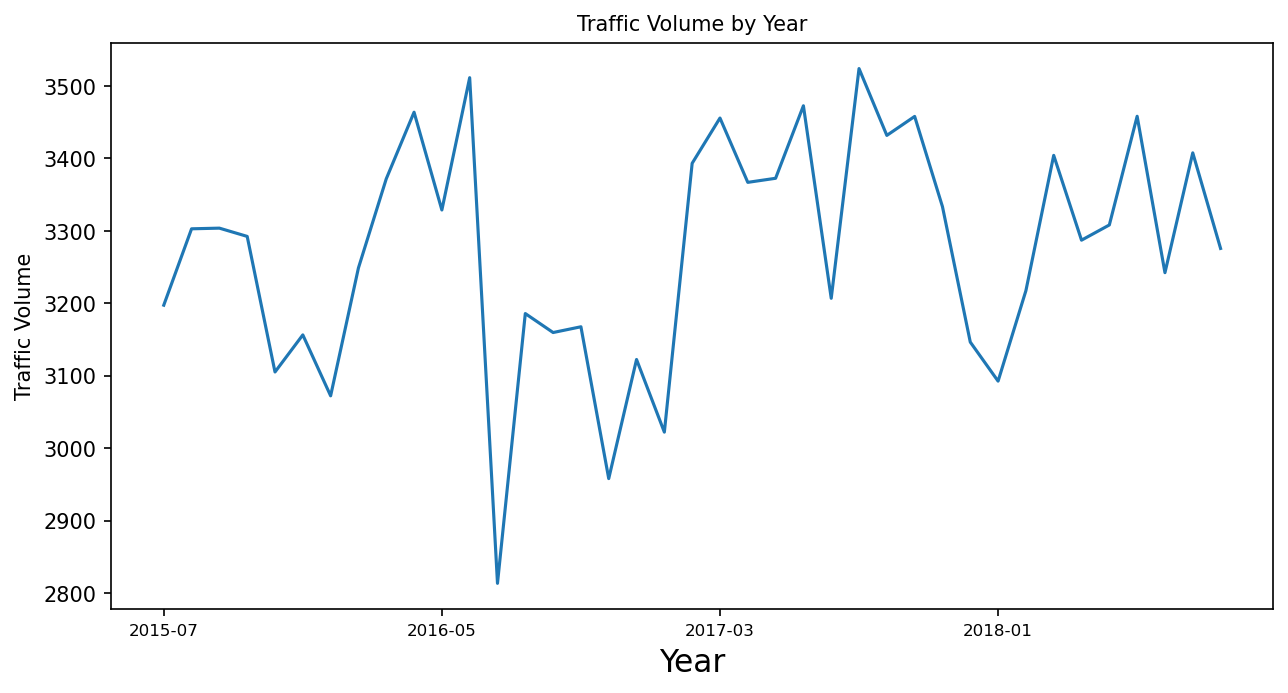

In [8]:
plt.figure( figsize=(10,5), dpi = 150)#figsize specifies the size of the image, dpi sets the sharpness of the image
plt.plot(metro_data_final_month)
plt.xticks(list(range(0, 40,10)),fontsize = 8)
plt.title("Traffic Volume by Year", fontsize = 10)  # set title
plt.xlabel ("Year" , fontsize = 15) # set x label name and font size
plt.ylabel ("Traffic Volume", fontsize = 10) # set Y label name and font size
plt.show()

After sorting by month and draw fig all dateset in one line, also it is difficult to find a periodicity due to no strong indicator
#

#### Try to draw fig use different color for each year try to find periodicity

In [9]:
metro_data_final_year_split = metro_data_final
metro_data_final_year_split = metro_data_final_year_split.groupby(metro_data_final_year_split.year)

# marge date for year 2015,2016,2017,2018
merge_data = metro_data_final_year_split.get_group('2015').drop(['date', 'year','year-month'],axis =1).rename(columns= {'traffic_volume': '2015'})
for i in ['2016','2017','2018']:
    data_temp = metro_data_final_year_split.get_group(i).drop(['date', 'year','year-month'],axis =1).rename(columns= {'traffic_volume': i})
    merge_data = pd.merge( merge_data,data_temp,how='outer', on= ['month-day'])
day = merge_data["month-day"].str.split(pat = "-", expand = True)
merge_data['month'] = day[0]
merge_data['day'] = day[1]

merge_data_year = merge_data # keep original data for future
merge_data_year = merge_data_year.set_index('month-day').sort_index(axis = 0)
merge_data_year = merge_data_year.drop(["month","day"],axis = 1)
merge_data_year = merge_data_year.sort_index(axis =0)
merge_data_year.head()

,2015,2016,2017,2018
month-day,,,,
01-01,NaN,1815.210526,2127.625000,1749.333333
01-02,NaN,2278.777778,2376.380952,3365.892857
01-03,NaN,2202.153846,2675.129032,3286.200000
01-04,NaN,3899.571429,3405.240000,3535.250000
01-05,NaN,3595.294118,2900.838710,3618.958333


### Draw figure for every sigle year traffic volum

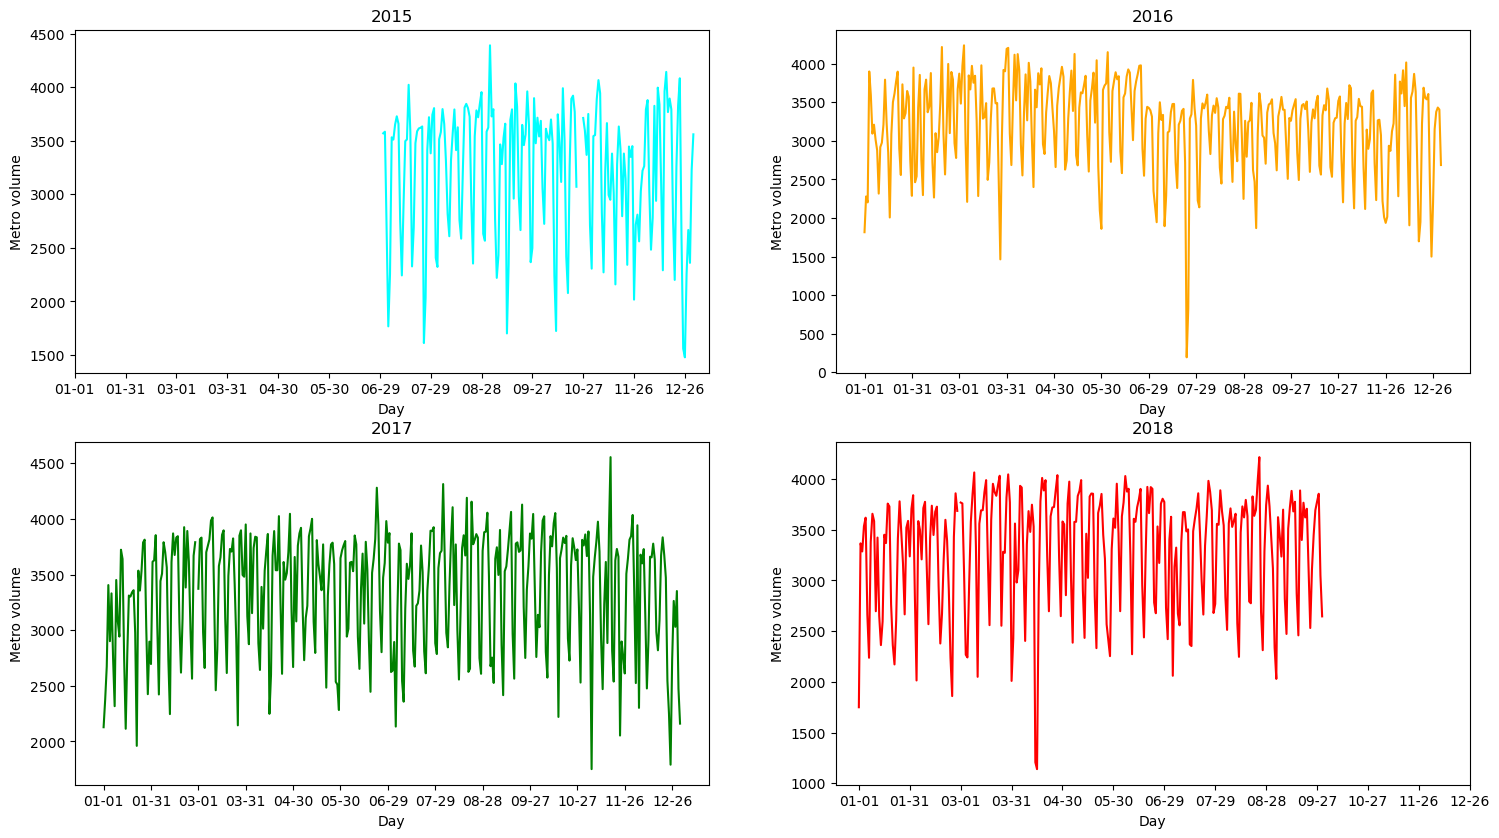

In [10]:
colors = ["cyan","orange","green",'red']
index = 0
figure = plt.figure(figsize=(18,10),dpi = 100)
for index_name in list(merge_data_year):
    axc = figure.add_subplot(2,2, index +1)
    axc.plot(merge_data_year[index_name],color = colors[index])
    axc.set_xticks(list(range(0,366,30)))
    axc.set_title(index_name)
    axc.set_xlabel("Day")
    axc.set_ylabel("Metro volume")
    index = index + 1

### As the chart above is obtained based on the traffic information from 2015 to 2018, we can see that there is a clear cyclicality in the traffic flow chart for each year in a certain interval, but it is difficult to pinpoint the cyclicality of the traffic flow, below I put the traffic flow for four years on the one figure for comparison

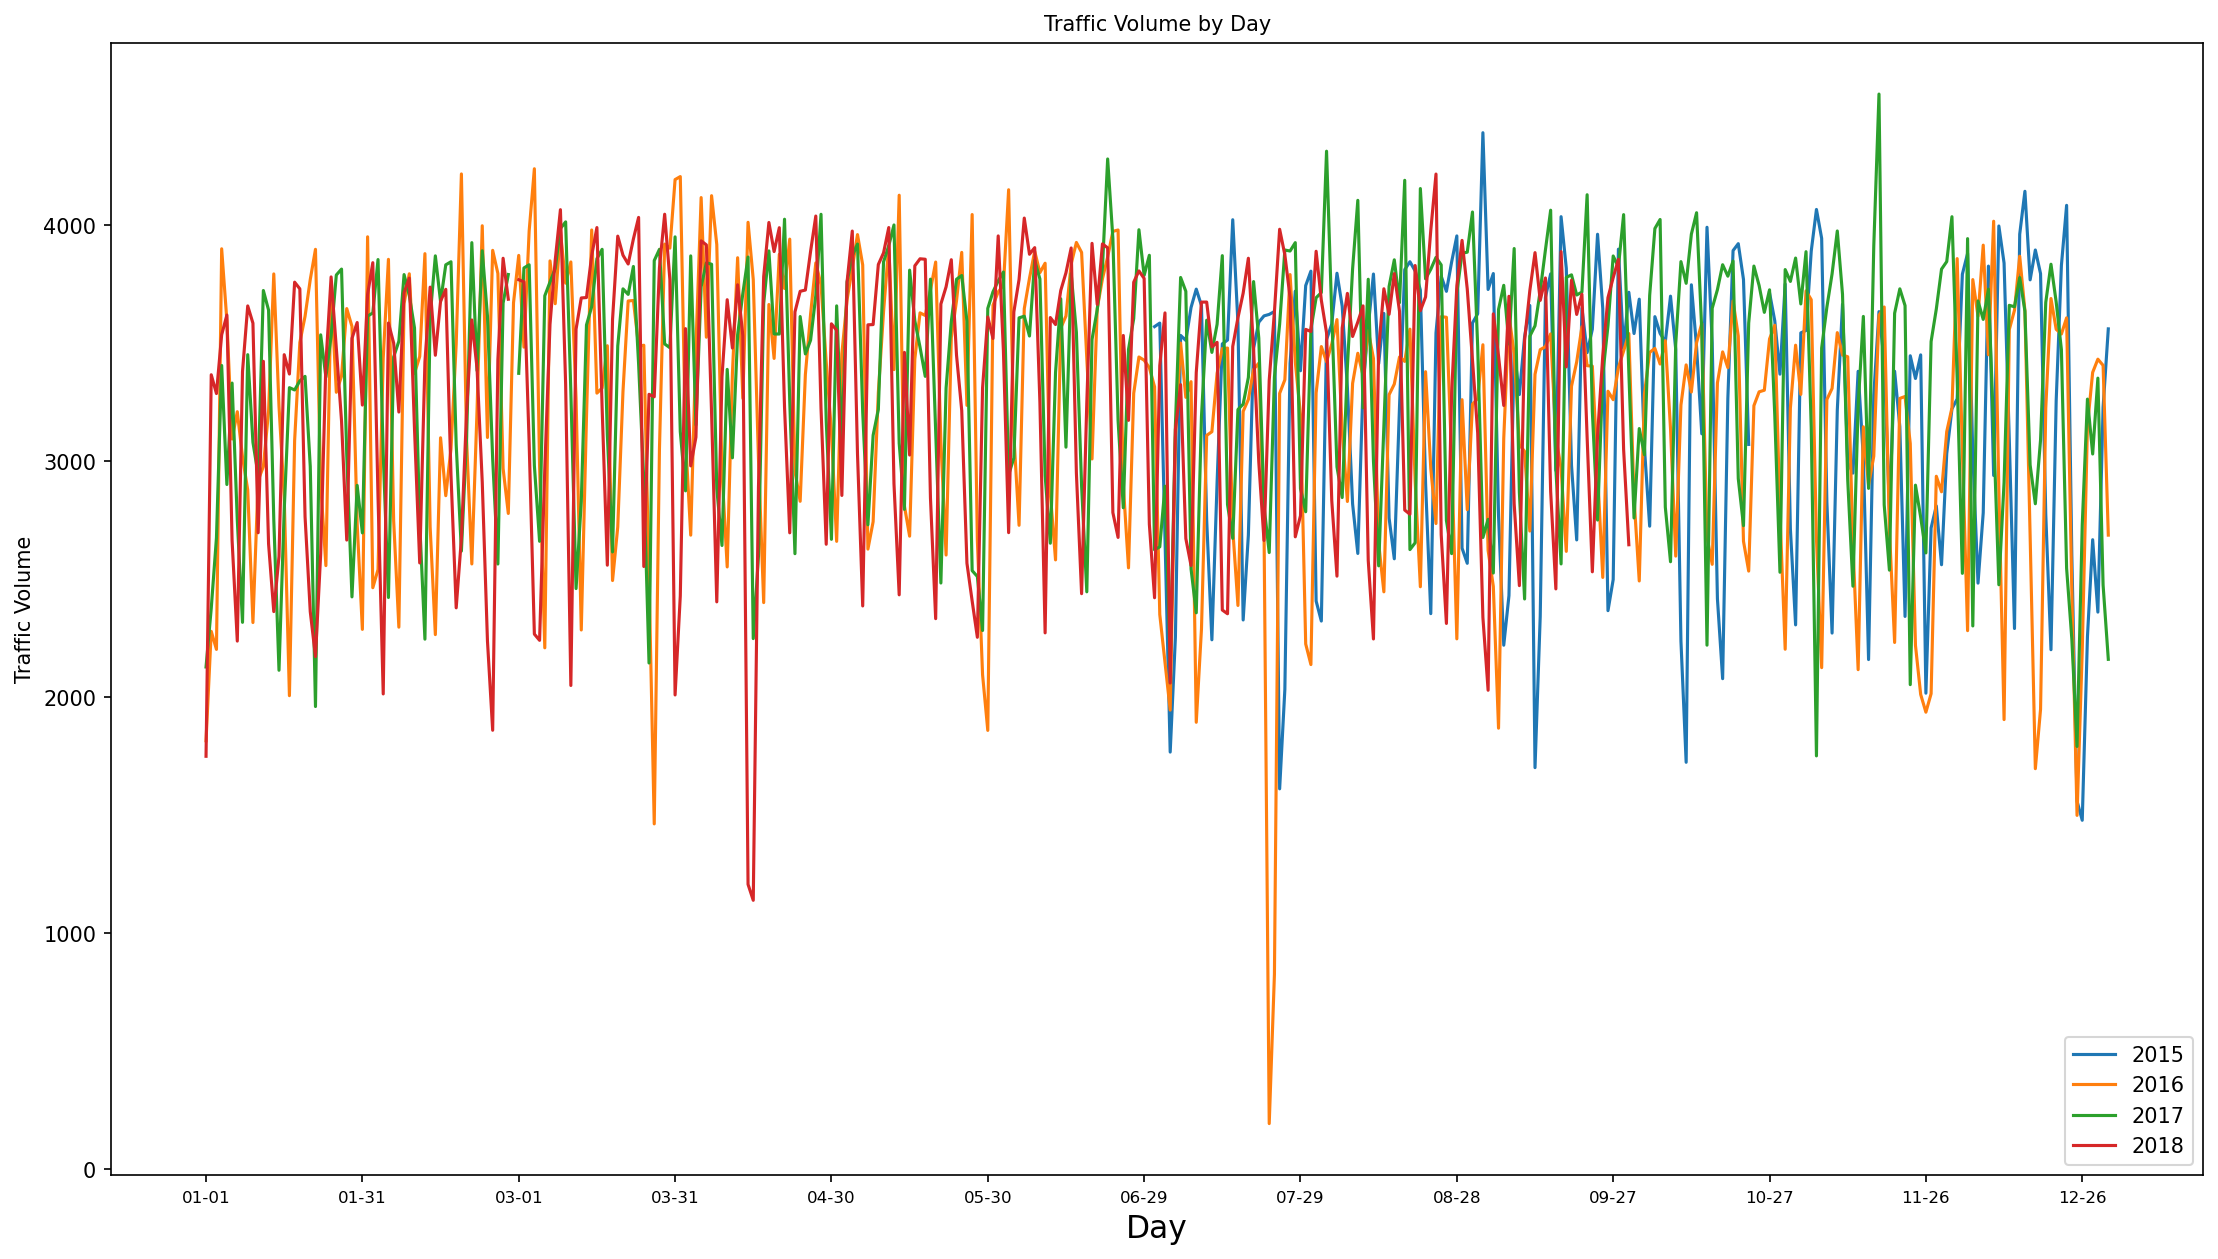

In [11]:
plt.figure( figsize=(18,10), dpi = 150)#figsize specifies the size of the image, dpi sets the sharpness of the image
plt.plot(merge_data_year)
plt.xticks(list(range(0, 366,30)),fontsize = 8)
plt.title("Traffic Volume by Day", fontsize = 10)  # set title
plt.xlabel ("Day" , fontsize = 15) # set x label name and font size
plt.ylabel ("Traffic Volume", fontsize = 10) # set Y label name and font size
plt.legend(('2015', '2016', '2017','2018'),
           loc='lower right')
plt.show()

### As depicted in the graph, the traffic flow trend throughout the same four-year period is nearly same; nevertheless, due to the enormous amount of data and some missing data, it is still difficult to determine the exact periodicity. I will devote one time period to analyzing the traffic volume. I will took  August data to analyse the traffic flow.

First merge data, collect all year in August data

In [12]:
augData = merge_data
augData = augData.groupby(["month"]).get_group("08").drop(["month","month-day"],axis = 1).set_index("day")
augData.head()

,2015,2016,2017,2018
day,,,,
01,2407.041667,3288.708333,3692.166667,3889.103448
02,2322.250000,3485.250000,3714.000000,3681.458333
03,3514.416667,3421.142857,4313.088889,3543.468750
04,3581.083333,3495.958333,3621.240000,2833.121212
05,3795.958333,3599.541667,2975.538462,2512.500000


Draw figure for Aug metro traffic

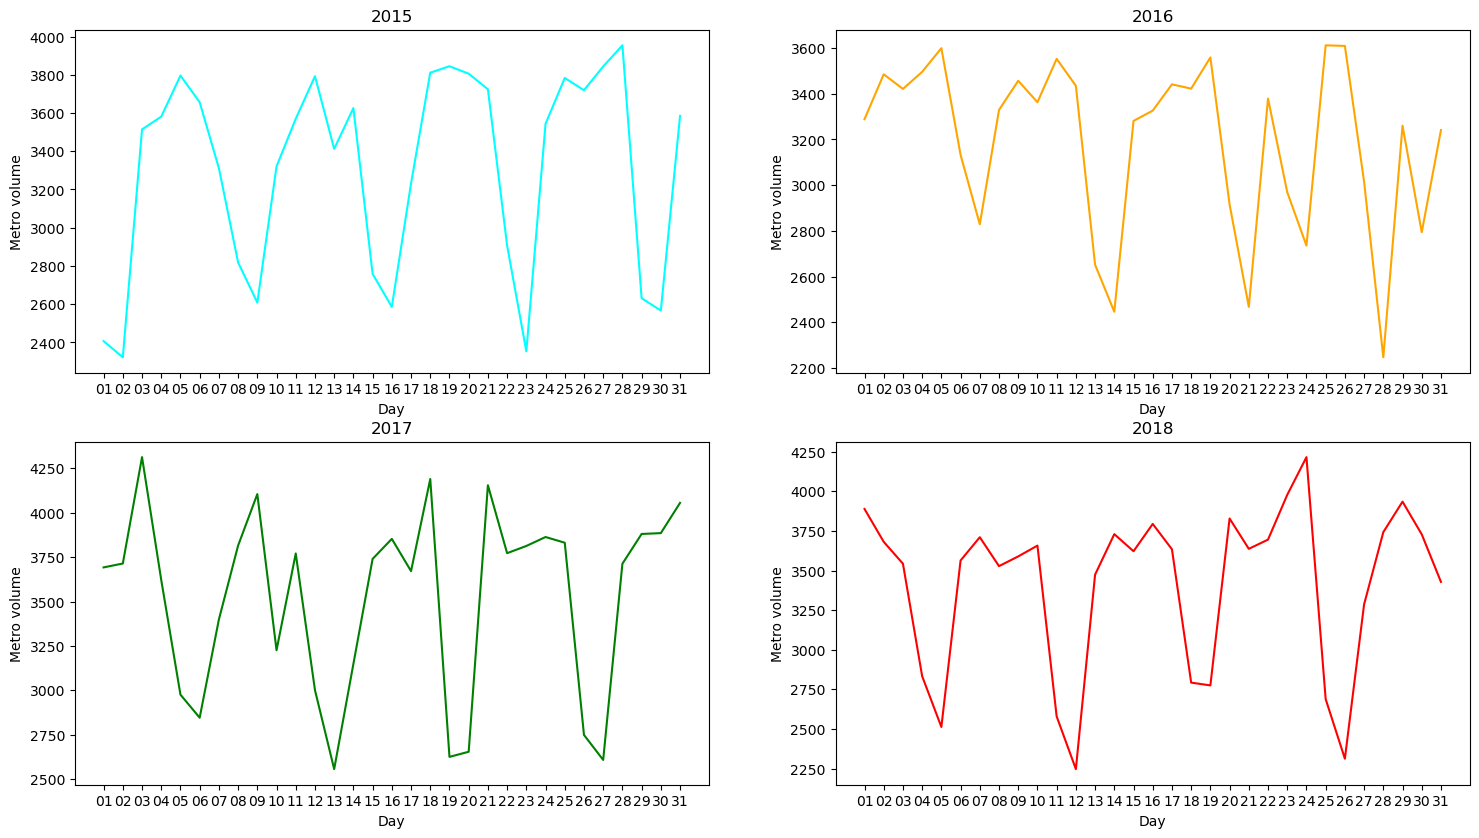

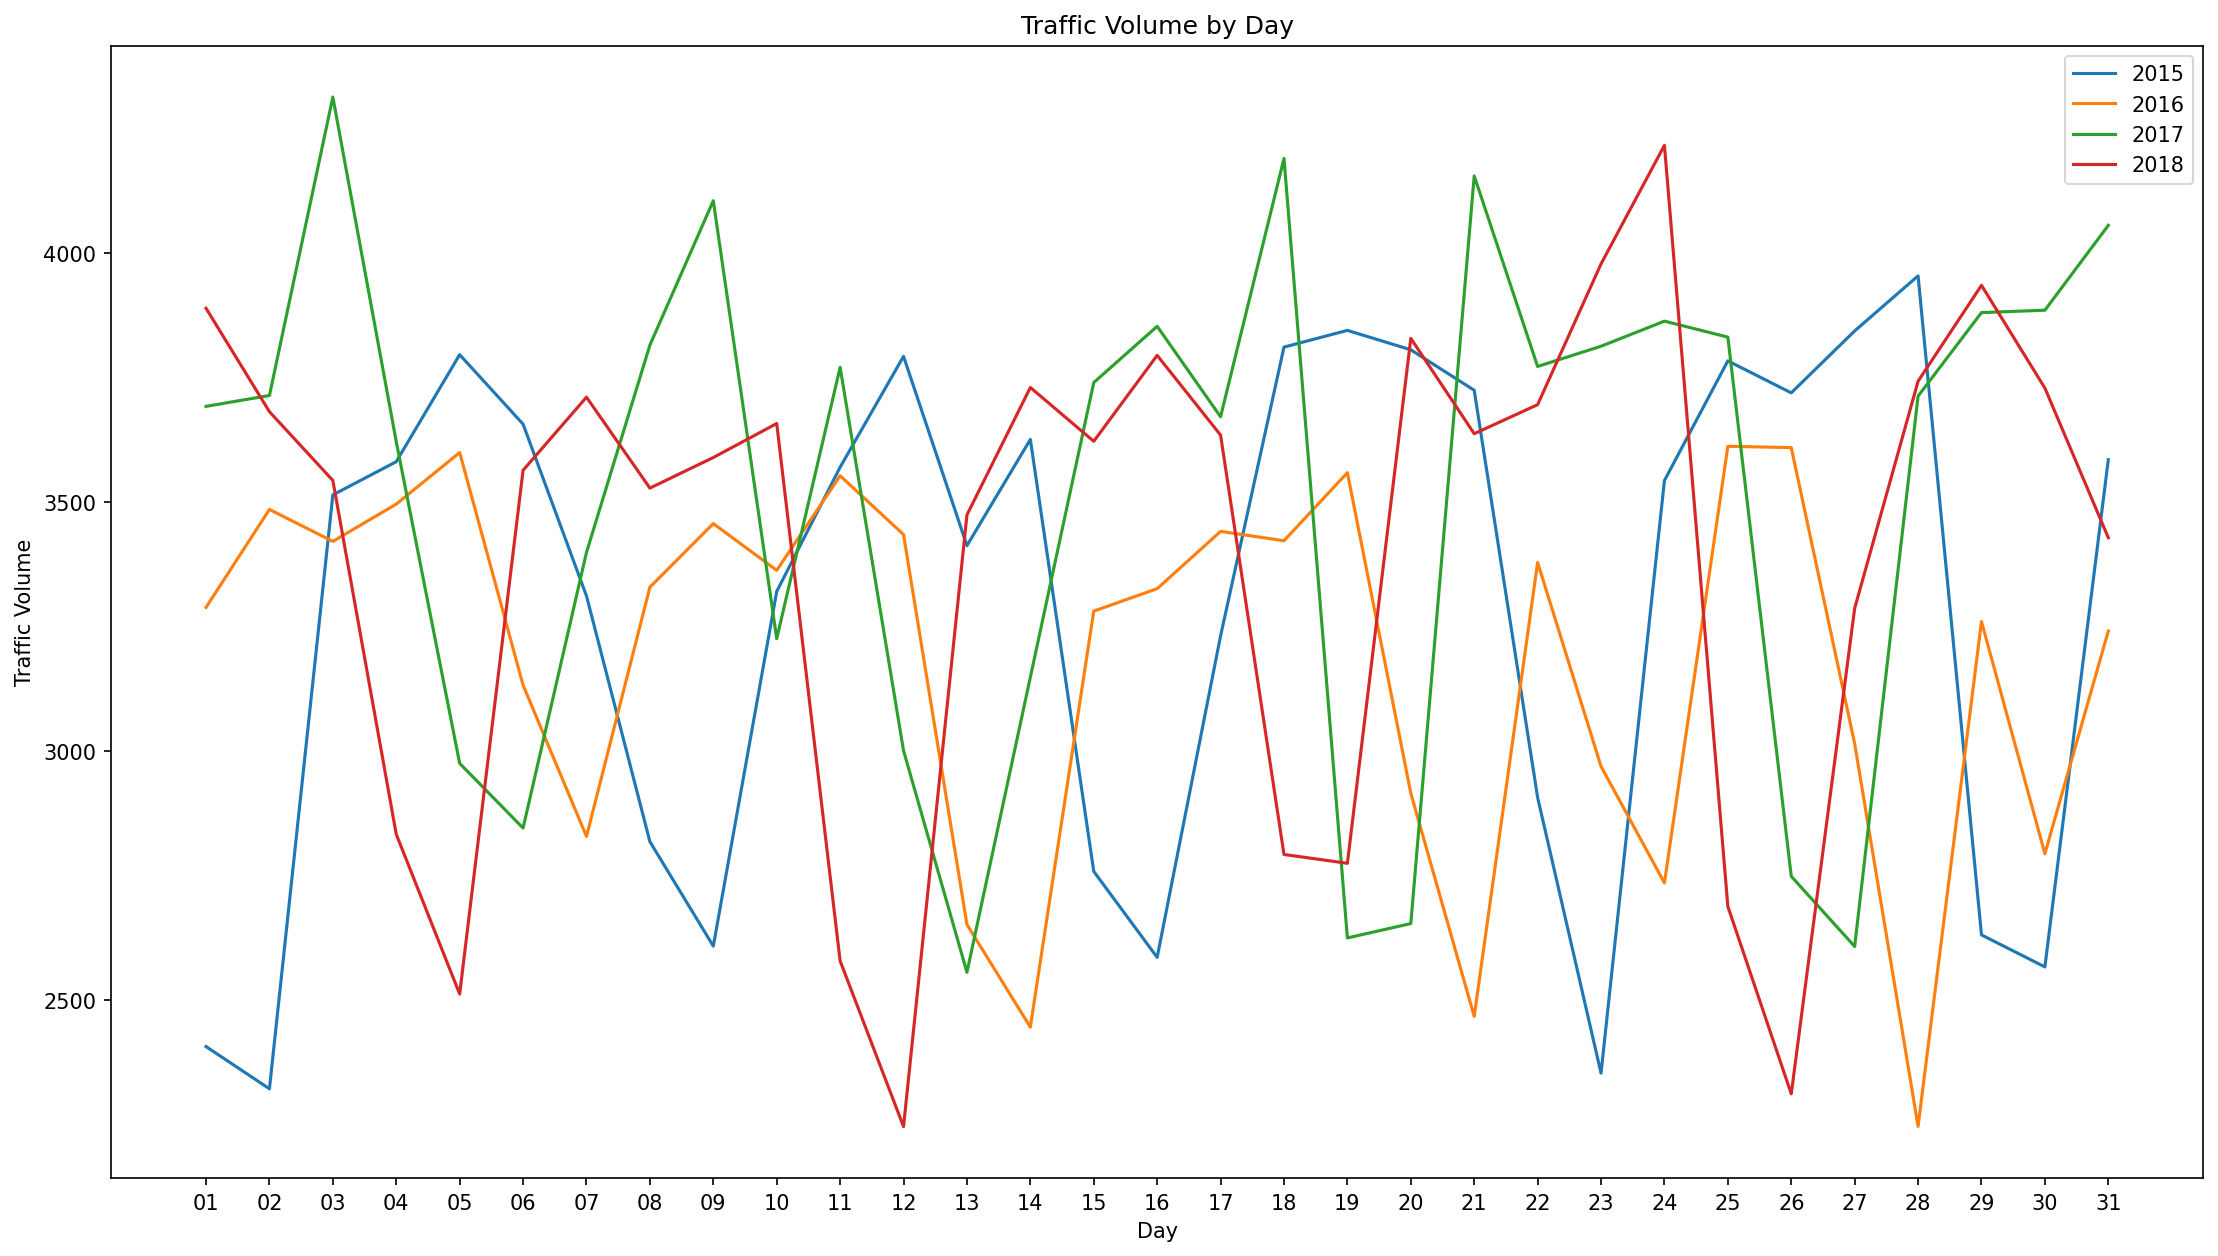

In [13]:
index = 0
figure = plt.figure(figsize=(18,10),dpi = 100)
for index_name in list(merge_data_year):
    axc = figure.add_subplot(2,2, index +1)
    axc.plot(augData[index_name],color = colors[index])
    axc.set_xticks(list(range(0,31)))
    axc.set_title(index_name)
    axc.set_xlabel("Day")
    axc.set_ylabel("Metro volume")
    index = index + 1
plt.figure( figsize=(18,10), dpi = 150)#figsize specifies the size of the image, dpi sets the sharpness of the image
plt.plot(augData)
plt.xticks(list(range(0, 31)))
plt.title("Traffic Volume by Day")  # set title
plt.xlabel ("Day" ) # set x label name and font size
plt.ylabel ("Traffic Volume") # set Y label name and font size
plt.legend(('2015', '2016', '2017','2018'),loc='upper right')
plt.show()

### From the above graph, it is clear that there are four peaks and valleys in the same month for each year.

In 2015, the first trough was on 02/08, the second trough was on 09/08, with a seven-day cycle, i.e. Sunday to Sunday, while the peak occurred on 05/08 Wednesday

2016 The first trough was on 07/08, the second trough was on 14/08, a seven-day cycle, Sunday to Sunday, and the peak occurred on 11/08 Thursday

2017 The first trough was on 06/08, the second on 13/08, with a seven-day cycle, Sunday to Sunday, nd the peak occurred on 09/08 Wednesday

2018 The first valley is on 05/08, the second valley is on 12/08, the cycle is seven days, i.e. Sunday to Sunday, and the peak occurs on 07/08 Tuesday

### We can roughly conclude that the traffic flow has a cycle of seven days, i.e. Sunday to Sunday, and the peak will most likely occur in the middle of the week.


### Let's analyze further and see if cyclicality will appear in each day

In [14]:
# collect data in same cycle
metro_data_split_time = metro_data_split
metro_data_split_time['time'] = metro_data_split_time['time'].str.split(pat=":",expand=True)[0]
dateSelect = ['2015-08-03','2015-08-04','2015-08-05','2015-08-06','2015-08-07','2015-08-08','2015-08-09']
merge_data_week = metro_data_split_time.groupby(['date']).get_group('2015-08-02').drop(['date'],axis = 1).set_index('time').rename(columns= {'traffic_volume': '2015-08-02'})
for i in dateSelect:
         Y_day_index= metro_data_split_time.groupby(['date']).get_group(i).drop(['date'],axis = 1).set_index('time').rename(columns= {'traffic_volume': i})
         merge_data_week = pd.merge( merge_data_week,Y_day_index,how='outer', on= ['time'])
merge_data_week.head()

,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09
time,,,,,,,,
00,1412,634,603,732.0,837,721,1414,1463
01,806,433,386,440.0,461,452,935,942
01,806,433,386,440.0,461,452,935,942
01,806,433,386,440.0,461,452,935,942
02,640,315,293,308.0,357,362,705,675


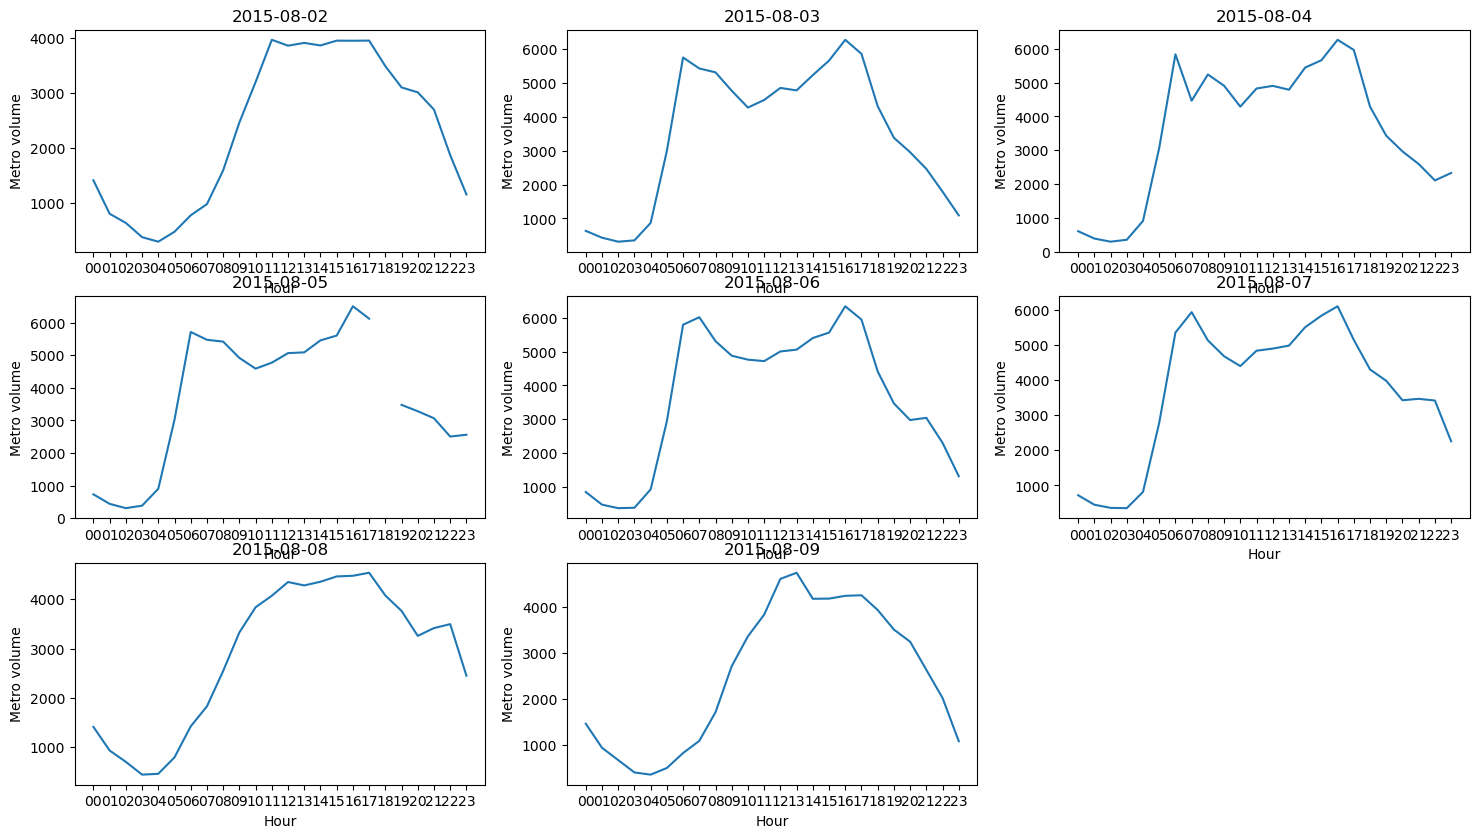

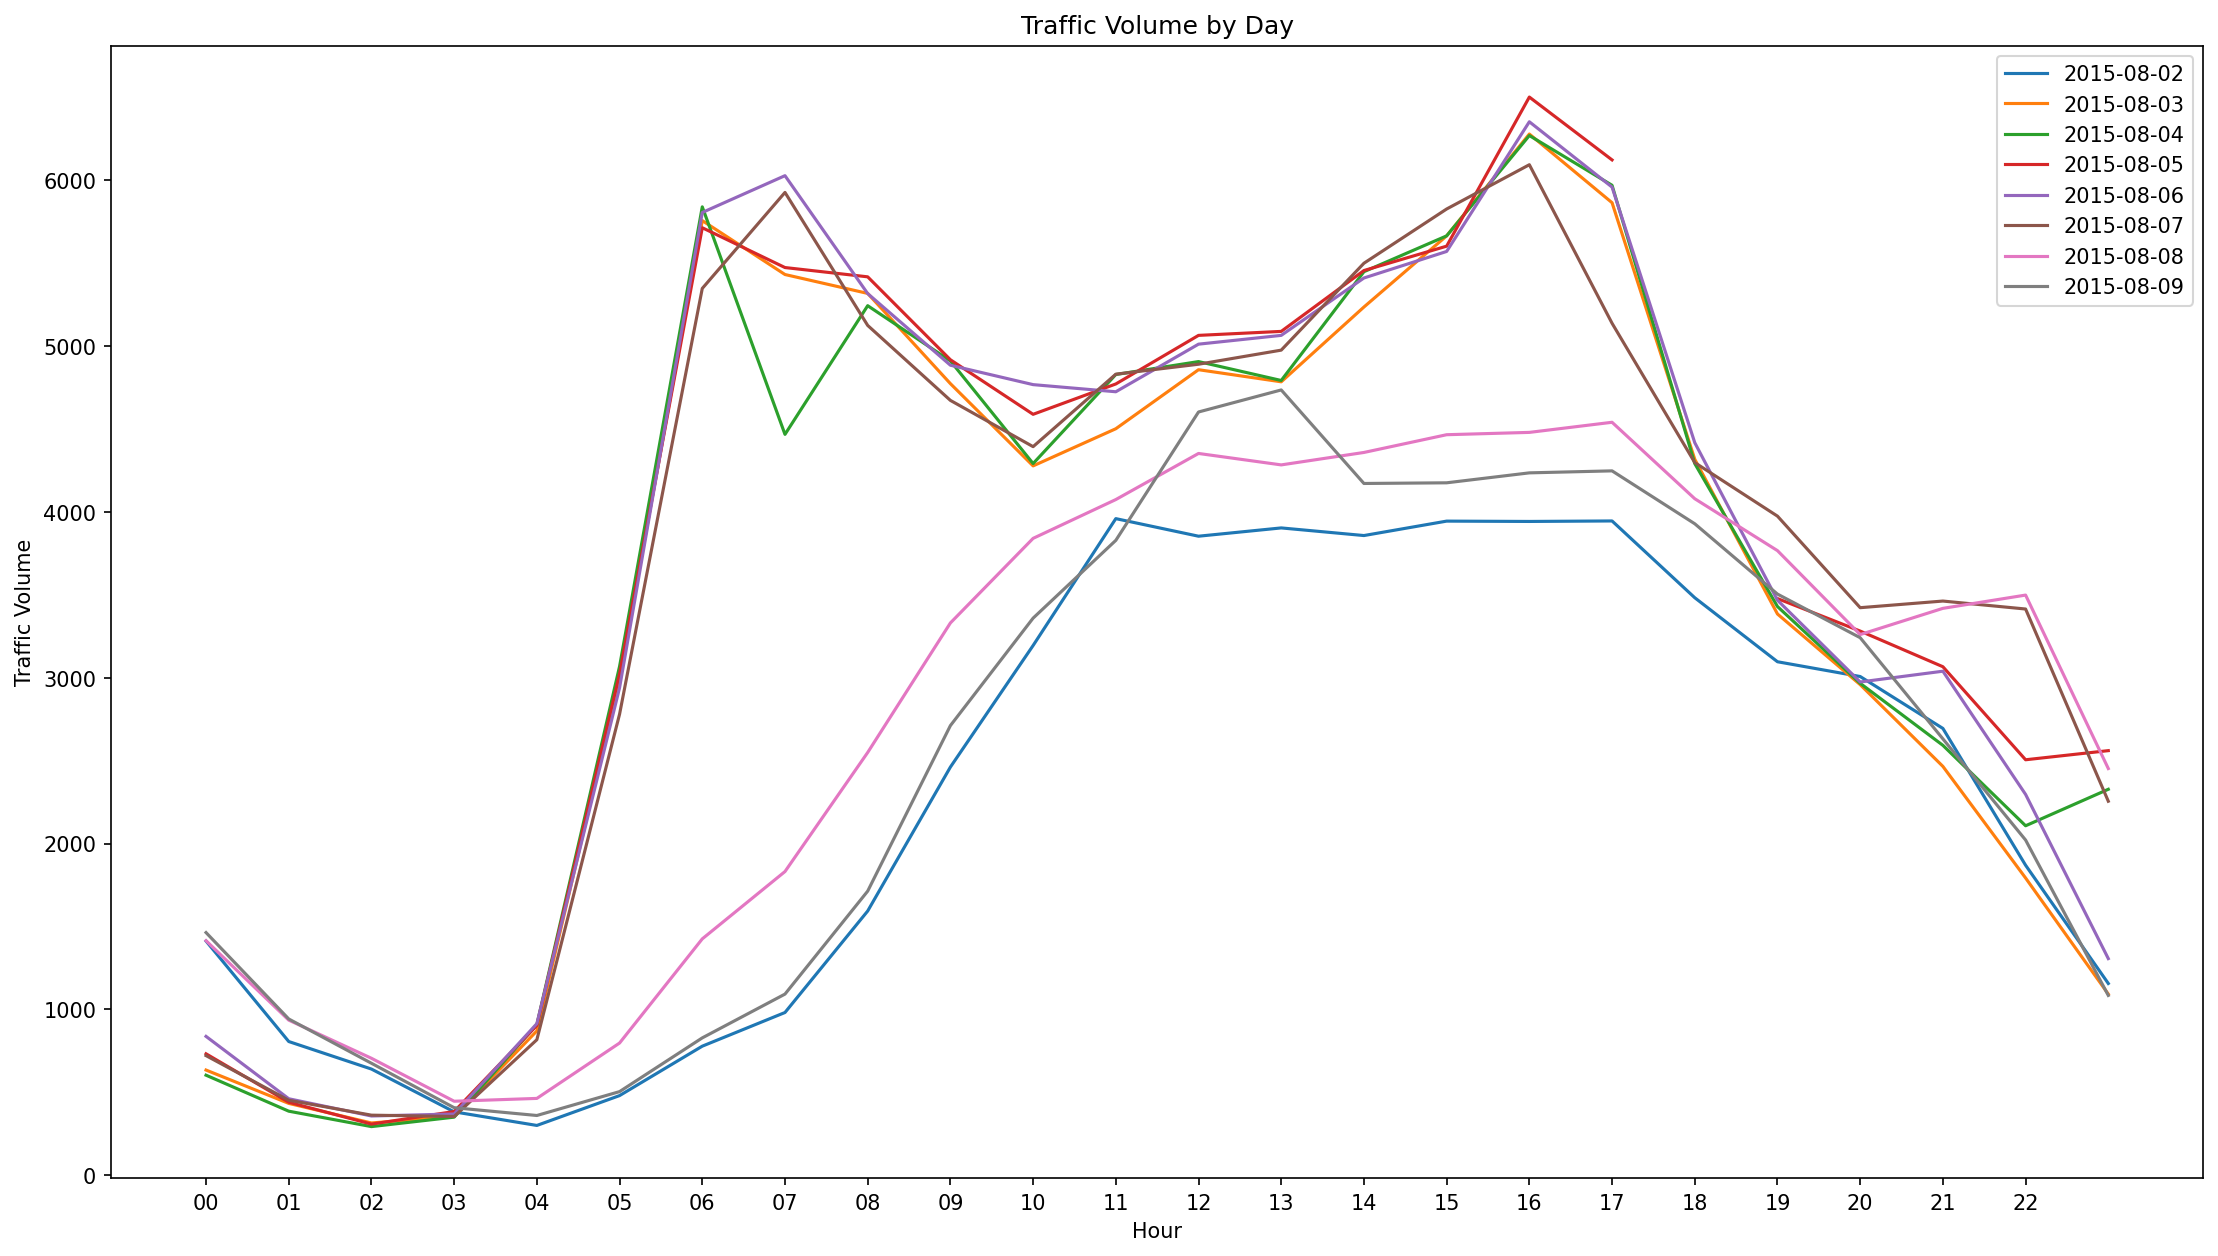

In [15]:
def Draw_fig ():
    index = 1
    figure = plt.figure(figsize=(18,10),dpi = 100)
    for index_name in list(merge_data_week):
        axc = figure.add_subplot(3,3,  index )
        axc.plot(merge_data_week[index_name])
        axc.set_xticks(list(range(0,24)))
        axc.set_title(index_name)
        axc.set_xlabel("Hour")
        axc.set_ylabel("Metro volume")
        index = index + 1
    plt.figure( figsize=(18,10), dpi = 150)#figsize specifies the size of the image, dpi sets the sharpness of the image
    plt.plot(merge_data_week)
    plt.xticks(list(range(0, 23)))
    plt.title("Traffic Volume by Day")  # set title
    plt.xlabel ("Hour" ) # set x label name and font size
    plt.ylabel ("Traffic Volume") # set Y label name and font size
    plt.legend((dateSelect),loc='upper right')
    plt.show()
dateSelect = ['2015-08-02','2015-08-03','2015-08-04','2015-08-05','2015-08-06','2015-08-07','2015-08-08','2015-08-09']
Draw_fig()

### As you can see in the graph above, the traffic cycle also exists weekday, with two peaks at 6:00 am and 4:00 pm. In the weekend the peak volume in around mid-day
### To prove that this cycle does not exist by chance, I will took the data from other year in further analysis

In [16]:
# Analysis for year 2016
metro_data_split_time = metro_data_split
metro_data_split_time['time'] = metro_data_split_time['time'].str.split(pat=":",expand=True)[0]
dateSelect = ['2016-08-08','2016-08-09','2016-08-10','2016-08-11','2016-08-12','2016-08-13','2016-08-14']
merge_data_week = metro_data_split_time.groupby(['date']).get_group('2016-08-07').drop(['date'],axis = 1).set_index('time').rename(columns= {'traffic_volume': '2016-08-07'})
for i in dateSelect:
         Y_day_index= metro_data_split_time.groupby(['date']).get_group(i).drop(['date'],axis = 1).set_index('time').rename(columns= {'traffic_volume': i})
         merge_data_week = pd.merge( merge_data_week,Y_day_index,how='outer', on= ['time'])
merge_data_week.head()

,2016-08-07,2016-08-08,2016-08-09,2016-08-10,2016-08-11,2016-08-12,2016-08-13,2016-08-14
time,,,,,,,,
00,1875,848,662,811,814,874,1721,1721
01,1023,660,554,534,539,556,1165,1165
02,814,440,440,443,442,436,692,692
03,561,457,484,485,478,549,404,404
04,541,966,986,1045,941,1056,294,294


In [ ]:
### Draw for year 2016

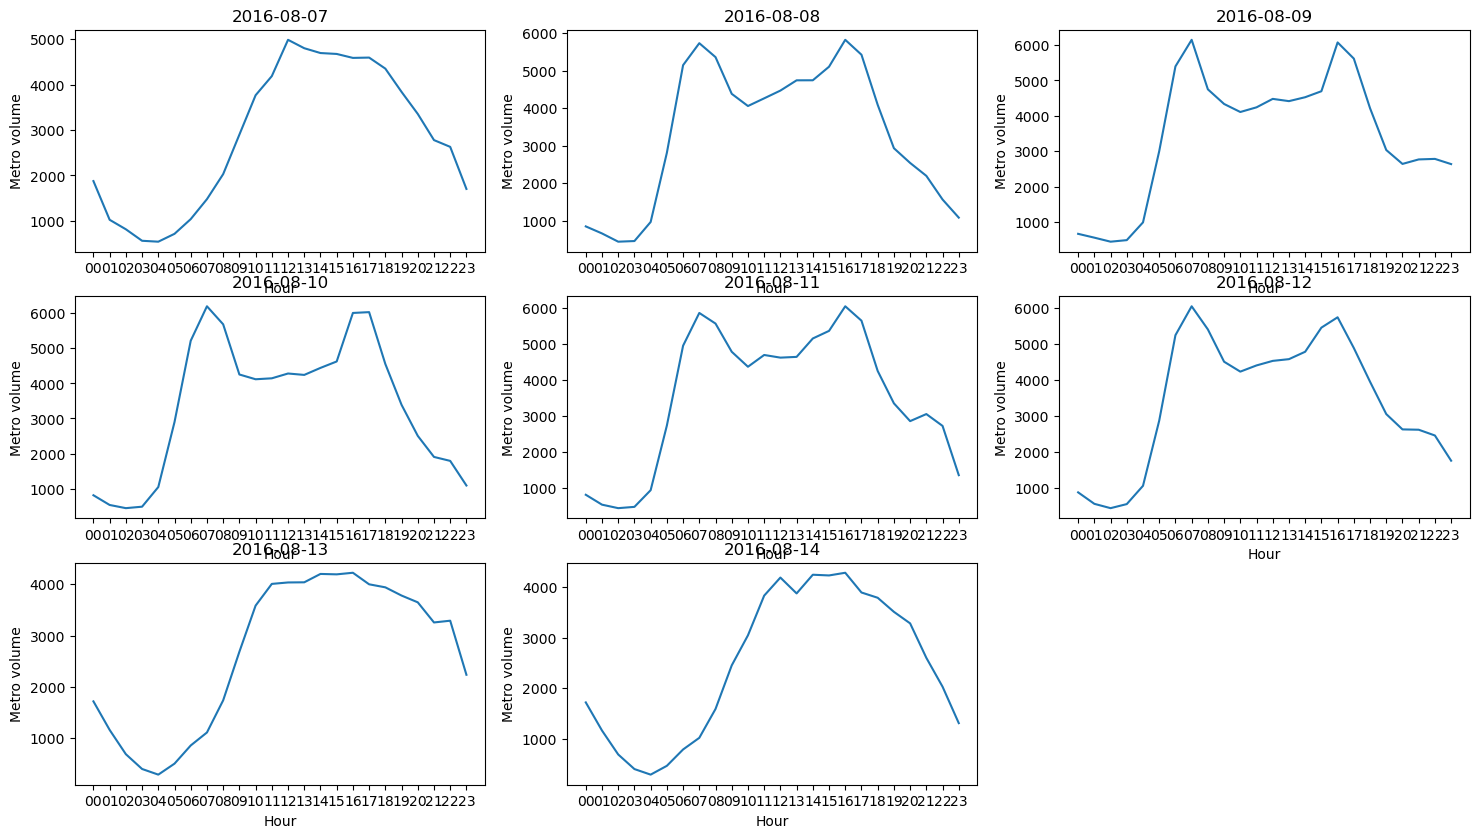

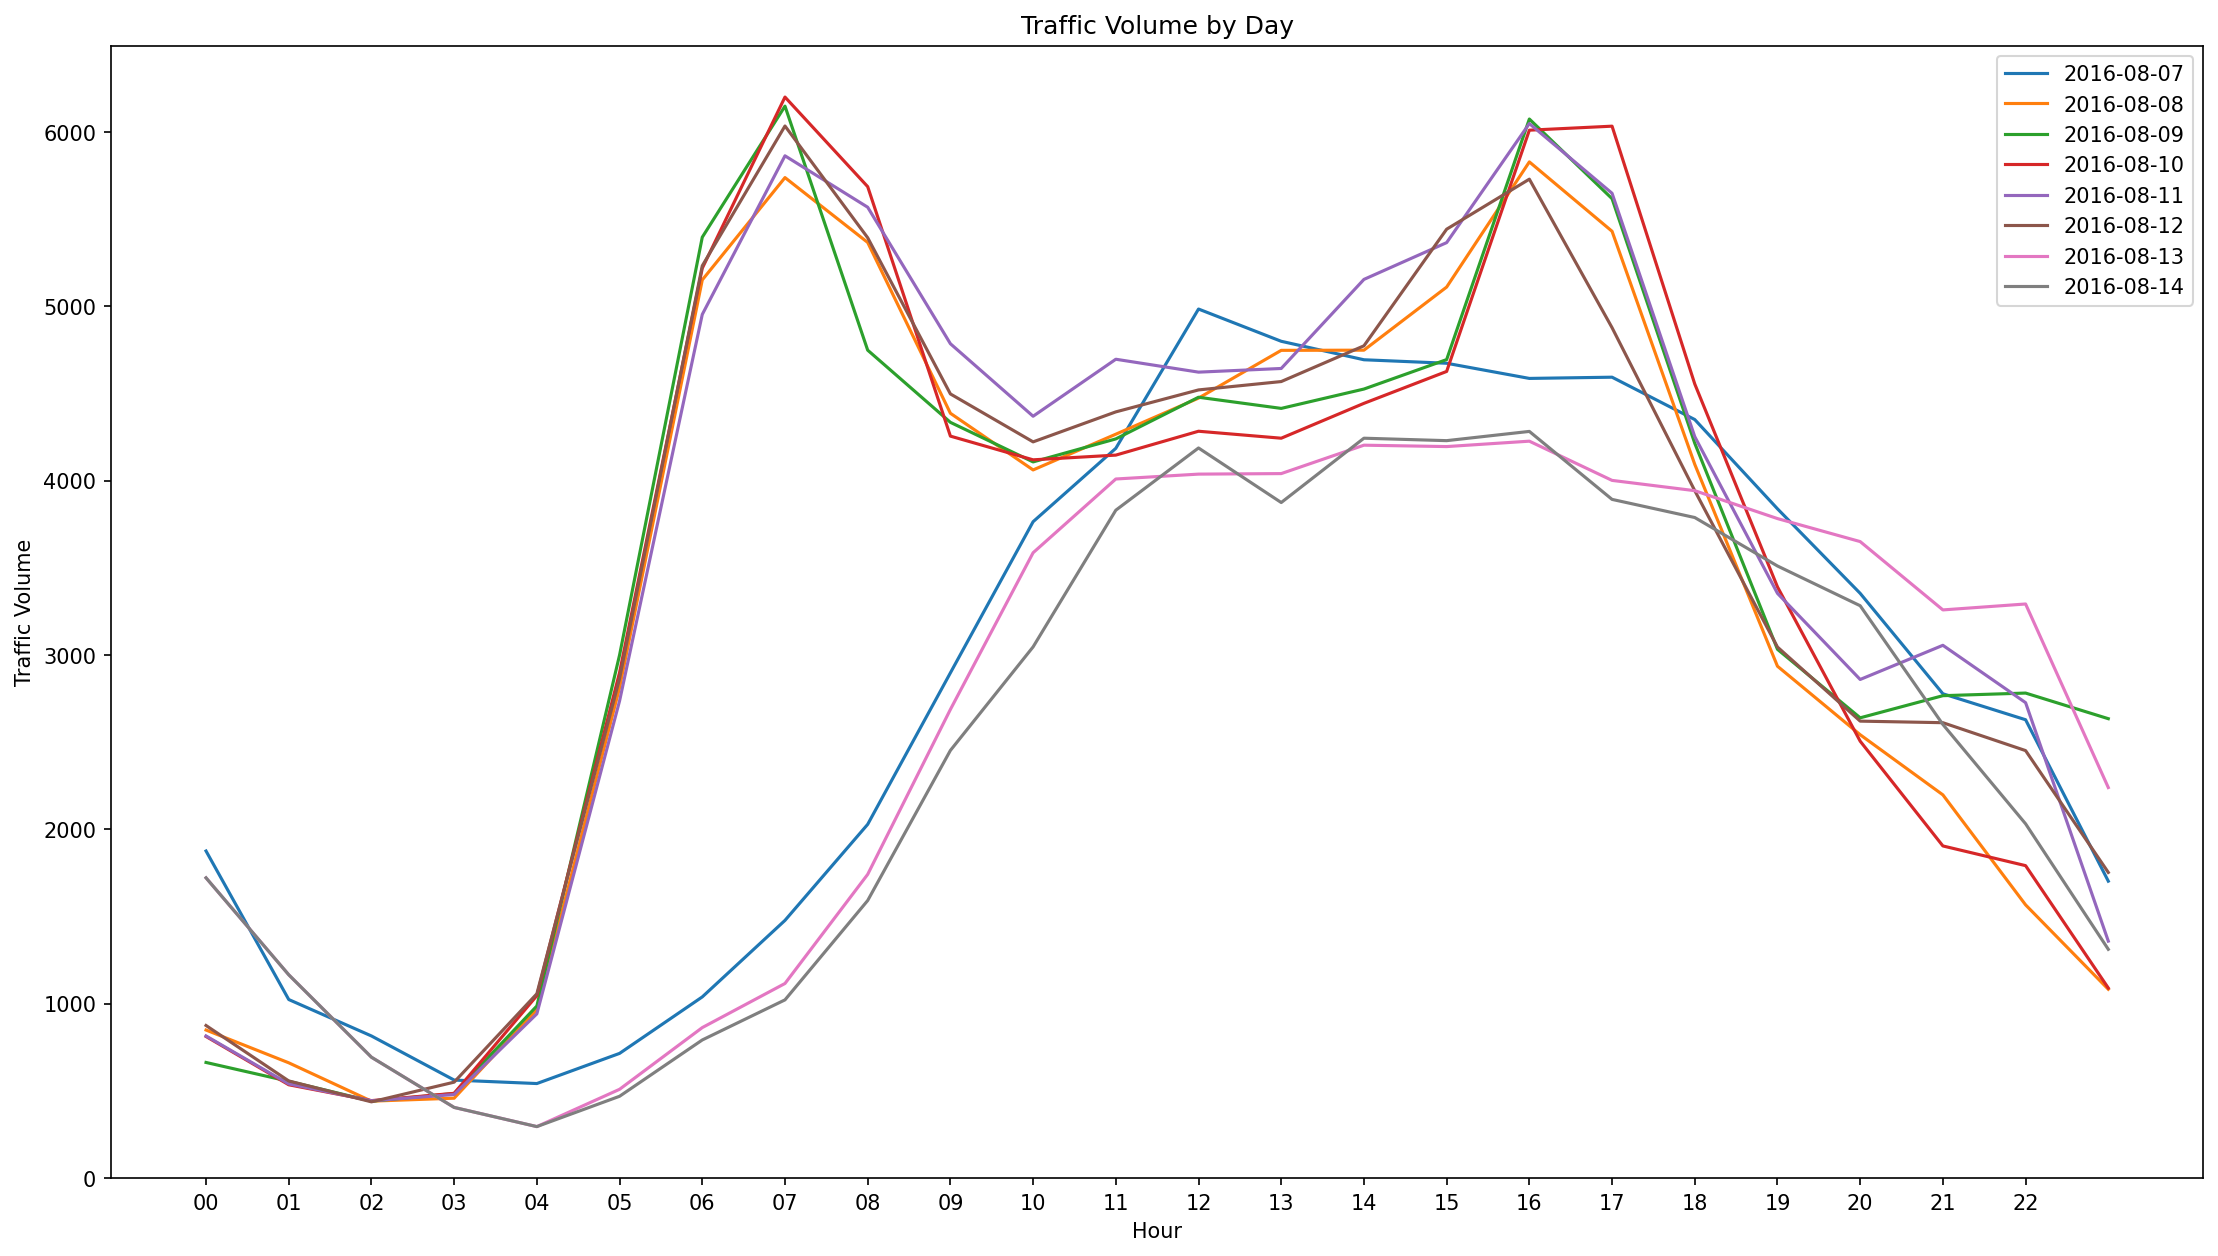

In [17]:
dateSelect = ['2016-08-07','2016-08-08','2016-08-09','2016-08-10','2016-08-11','2016-08-12','2016-08-13','2016-08-14']
Draw_fig()

### Draw Fig for 2017

In [18]:
# Analysis for year 2017
metro_data_split_time = metro_data_split
metro_data_split_time['time'] = metro_data_split_time['time'].str.split(pat=":",expand=True)[0]
dateSelect = ['2017-08-07','2017-08-08','2017-08-09','2017-08-10','2017-08-11','2017-08-12','2017-08-13']
merge_data_week = metro_data_split_time.groupby(['date']).get_group('2017-08-06').drop(['date'],axis = 1).set_index('time').rename(columns= {'traffic_volume': '2017-08-06'})
for i in dateSelect:
         Y_day_index= metro_data_split_time.groupby(['date']).get_group(i).drop(['date'],axis = 1).set_index('time').rename(columns= {'traffic_volume': i})
         merge_data_week = pd.merge( merge_data_week,Y_day_index,how='outer', on= ['time'])
merge_data_week.head()

,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13
time,,,,,,,,
00,1885,632,665,676,622,715,1532,1655
00,1885,632,665,676,622,715,1532,1655
00,1885,632,665,676,622,715,1532,1655
00,1885,632,665,676,622,715,1532,1655
01,1151,405,395,395,362,431,963,982


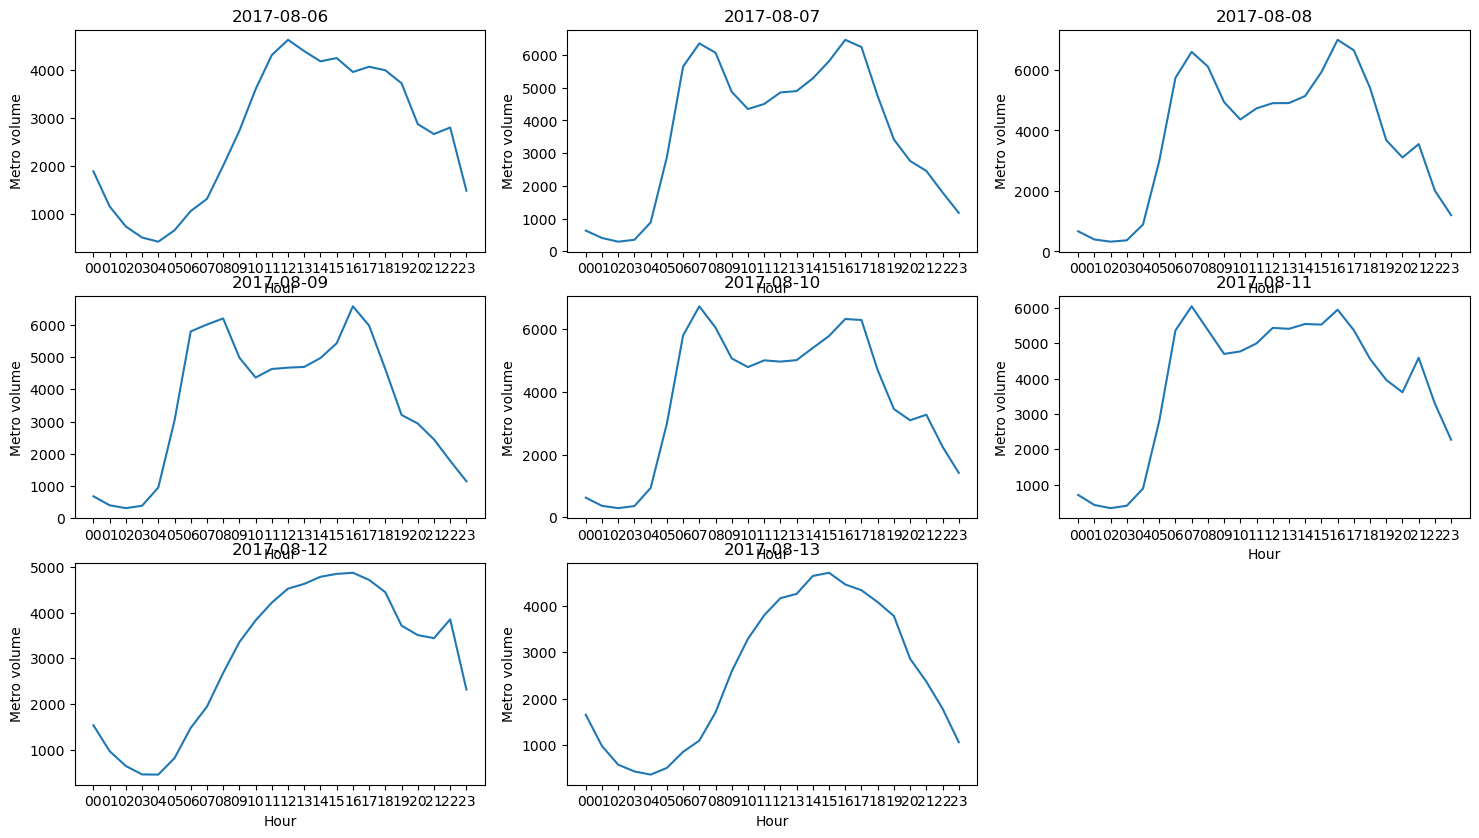

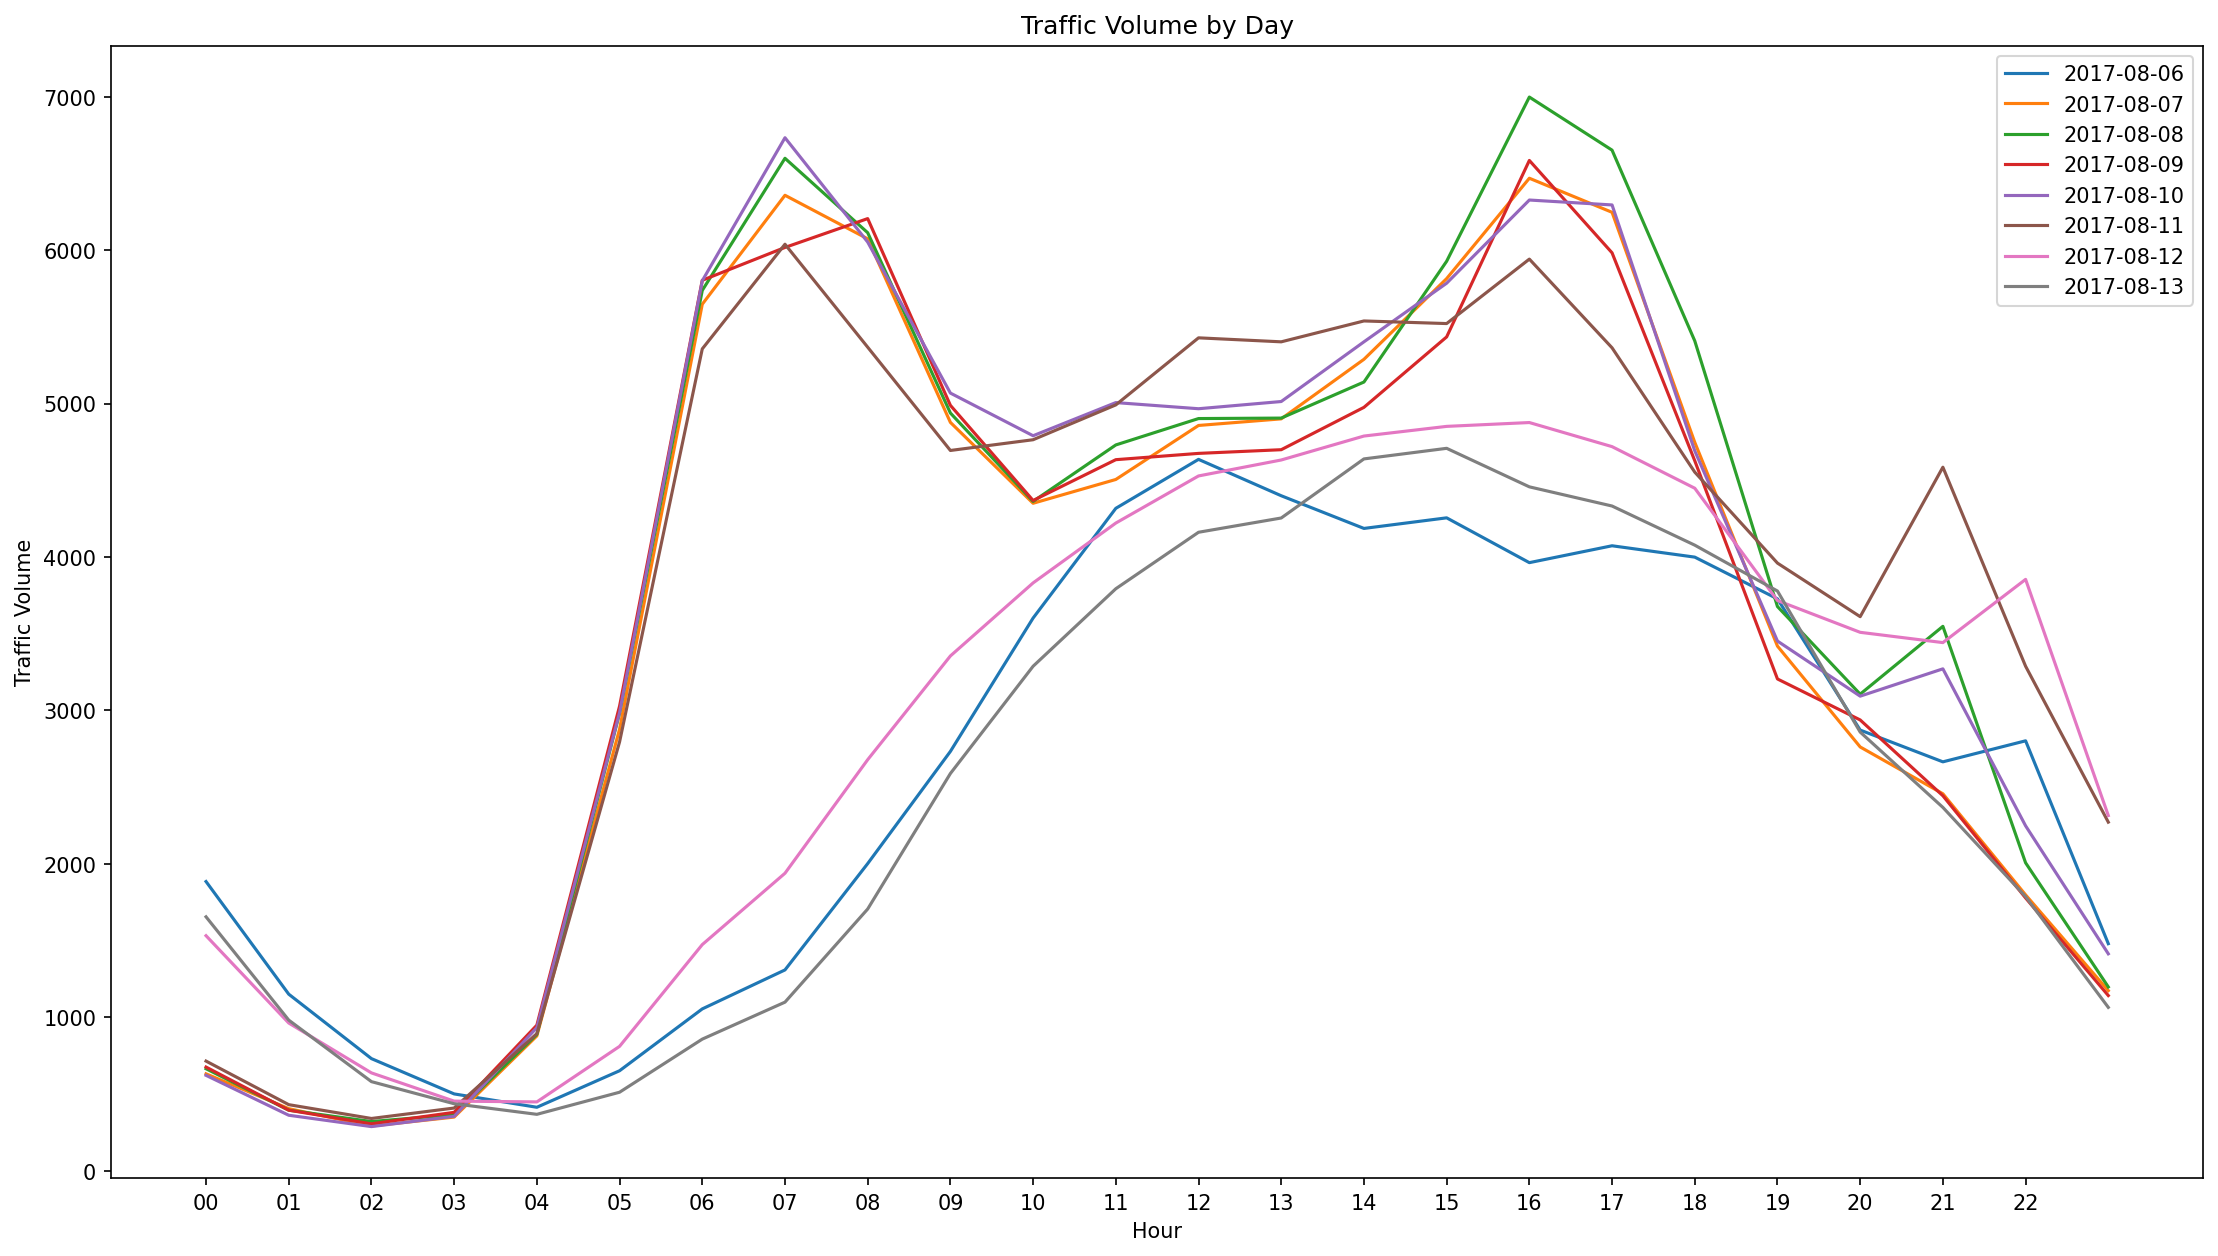

In [19]:
### Draw fig
dateSelect = ['2017-08-06','2017-08-07','2017-08-08','2017-08-09','2017-08-10','2017-08-11','2017-08-12','2017-08-13']
Draw_fig()

###  As you can see in the graph above, the traffic cycle exists in 2016 and 2017, also with two peaks around at 7:00 am and 4:00 pm one in the morning other one in the afternoon. And also in the weekend the peak volume in around mid-day


## There are three relatively clear cycles in this data set:
### 1. weekly cycle 
### 2. weekday cycle 
### 3. weekend cycle

## Task 2
### Task2 1.Extract hour, day and month features from the time-stamps.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns

In [21]:
# collect data
metro_df = pd.read_csv ("metro_traffic_15_19.csv")
metro_df.head()

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936


In [22]:
metro_time = pd.DataFrame(index = np.arange(0, len(metro_df)),columns = ["month","day","hour"])
date = metro_df["date_time"].str.split(expand=True)
date_month = date[0].str.split(pat = '-',expand = True)
date_time = date[1].str.split(pat = ':', expand = True)
metro_time['month'] = pd.to_numeric(date_month[1])
metro_time["day"] = pd.to_numeric(date_month[2])
metro_time["hour"] = pd.to_numeric(date_time[0])
metro_df = pd.concat ( [metro_time, metro_df], axis=1).drop(["date_time"],axis =1)
metro_db = pd.DataFrame(metro_df)
metro_task3 = pd.DataFrame(metro_df)  # data for task 3
metro_db.head()

,month,day,hour,rain_1h,snow_1h,temp,clouds_all,traffic_volume
0,7,1,0,0.0,0.0,289.20,1,737
1,7,1,1,0.0,0.0,289.40,1,444
2,7,1,2,0.0,0.0,289.19,1,347
3,7,1,3,0.3,0.0,288.74,1,356
4,7,1,4,0.0,0.0,288.07,1,936


In [23]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import seaborn as sns

### Bulid model

In [24]:
y = metro_db.pop("traffic_volume").values
x = metro_db.values
X_scal = StandardScaler().fit_transform(x)
(
    train_data,
    test_data,
    train_labels,
    test_labels,
) = sklearn.model_selection.train_test_split(X_scal, y, test_size= 0.33, random_state= 42)

### Task2 3.Build two different regression models and test the accuracy. Try Linear Regression and one other regression model from scikit learn.

#### Scikit - learn Linear Regression

In [25]:
# train
reg_1 = LinearRegression().fit(train_data, train_labels)

In [26]:
# test
print("Linear Reg mean absolute error: {:.3f}".format (mean_absolute_error(test_labels, reg_1.predict (test_data))))
print("MAPE : {:.3f}".format (MAPE(test_labels, reg_1.predict (test_data))))

Linear Reg mean absolute error: 1610.890
MAPE : 2.413


### scikit- learn Bayesian Ridge Regression

In [27]:
# train
reg_2 = BayesianRidge().fit(train_data,train_labels)

In [28]:
# test
print("Bayesian Ridge Reg mean absolute error:{:.3f}".format(mean_absolute_error(test_labels, reg_2.predict (test_data))))
print("MAPE:{:.3f}".format(MAPE(test_labels, reg_2.predict (test_data))))

Bayesian Ridge Reg mean absolute error:1611.019
MAPE:2.414


###  The performance results are not particularly good after evaluation by mean absolute error and MAPE, and will be evaluated by Task 3 to improve accuracy

## Task 3
### Given that the linear numeric encoding of the hour, day and month features may miss cyclical signals, investigate and test a cyclical strategy for encoding these features. Does this strategy improve accuracy for the models tested in Task 2?


In [29]:
data_task3 = metro_task3
data_task3

,month,day,hour,rain_1h,snow_1h,temp,clouds_all,traffic_volume
0,7,1,0,0.0,0.0,289.20,1,737
1,7,1,1,0.0,0.0,289.40,1,444
2,7,1,2,0.0,0.0,289.19,1,347
3,7,1,3,0.3,0.0,288.74,1,356
4,7,1,4,0.0,0.0,288.07,1,936
...,...,...,...,...,...,...,...,...
32042,9,30,19,0.0,0.0,283.45,75,3543
32043,9,30,20,0.0,0.0,282.76,90,2781
32044,9,30,21,0.0,0.0,282.73,90,2159
32045,9,30,22,0.0,0.0,282.09,90,1450


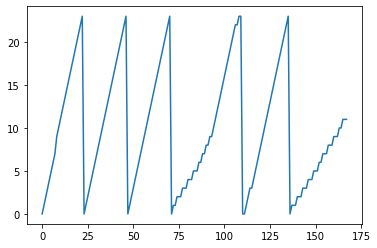

In [30]:
sample = data_task3[:168]
ax = sample['hour'].plot()

### We know from Task 1 that Metro has a 7-day periodicity, so I will try to improve the readiness rate with Encoding next.
### Encoding Cyclical Features

### I use sine/cosine transform Encoding Cyclical

#### When we observe the information in the data, the connection between two consecutive time periods is very strong. According to this logic, the connection between the first and last day and between the first and second day is very strong. In contrast, the connection between the first and fourth day is not as strong. The same applies to other time-related information. Trigonometric functions come to the rescue. We can encode the periodic time feature into two features using the following sine/cosine transformation.

In [31]:
def encode_cyclical(db,column,max_value):
    db[column + "_sin"] = np.sin(2 * np.pi * db[column]/max_value)
    db[column + "_cos"] = np.cos(2 * np.pi * db[column]/max_value)
    return db

In [32]:
data_task3  = encode_cyclical(data_task3 , 'hour', 24)
data_task3  = encode_cyclical(data_task3 , 'day', 31)
data_task3  = encode_cyclical(data_task3, 'month', 12)
data_task3 .head()

,month,day,hour,rain_1h,snow_1h,temp,clouds_all,traffic_volume,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,7,1,0,0.0,0.0,289.20,1,737,0.000000,1.000000,0.201299,0.97953,-0.5,-0.866025
1,7,1,1,0.0,0.0,289.40,1,444,0.258819,0.965926,0.201299,0.97953,-0.5,-0.866025
2,7,1,2,0.0,0.0,289.19,1,347,0.500000,0.866025,0.201299,0.97953,-0.5,-0.866025
3,7,1,3,0.3,0.0,288.74,1,356,0.707107,0.707107,0.201299,0.97953,-0.5,-0.866025
4,7,1,4,0.0,0.0,288.07,1,936,0.866025,0.500000,0.201299,0.97953,-0.5,-0.866025


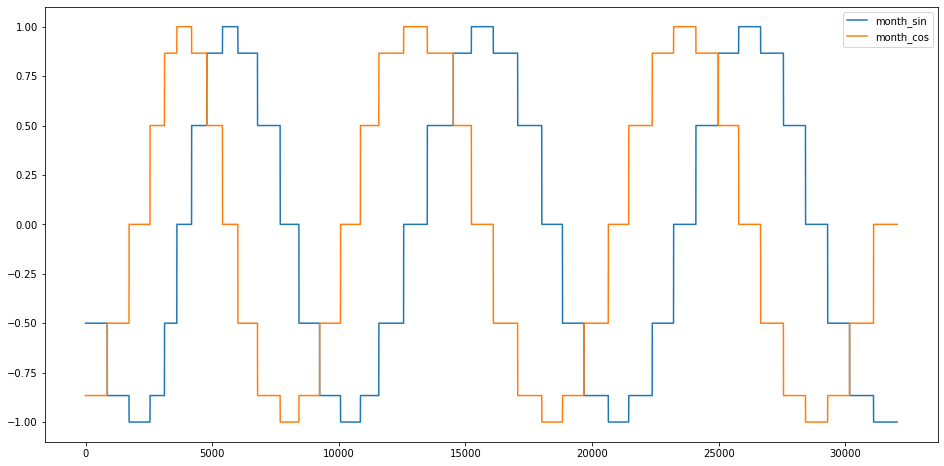

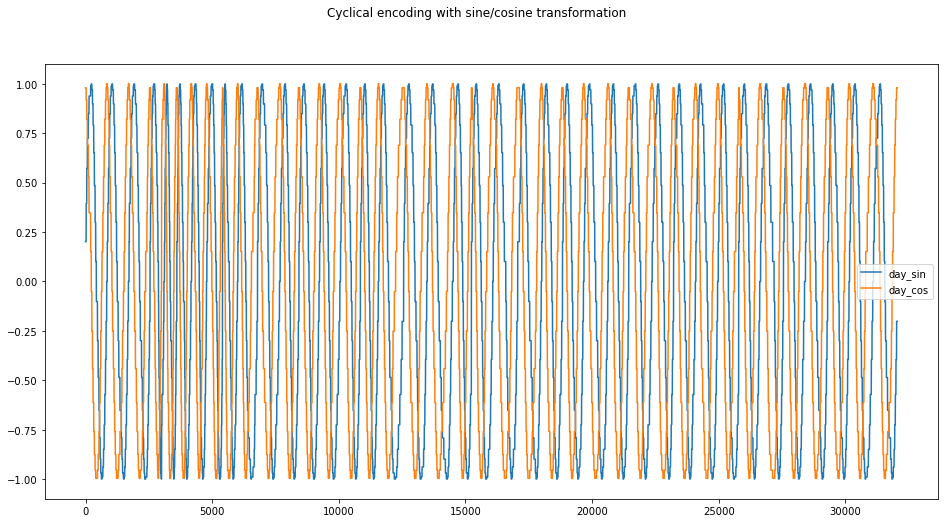

In [33]:
ax = data_task3[["month_sin", "month_cos"]].plot(figsize=(16,8))
ax = data_task3[["day_sin", "day_cos"]].plot(figsize=(16,8))
# ax = data_task3[['hour_sin','hour_cos']].plot(figsize=(16,8))
plt.suptitle("Cyclical encoding with sine/cosine transformation");

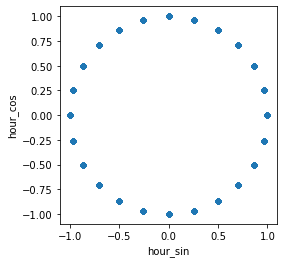

In [34]:
ax = data_task3.plot.scatter('hour_sin', 'hour_cos').set_aspect('equal')

### Build model

In [35]:
y = data_task3.pop("traffic_volume").values
x = data_task3.values
X_scal = StandardScaler().fit_transform(x)
(
    train_data,
    test_data,
    train_labels,
    test_labels,
) = sklearn.model_selection.train_test_split(X_scal, y, test_size= 0.33, random_state= 42)

In [36]:
# train
reg_1 = LinearRegression().fit(train_data, train_labels)

In [37]:
# test
print("Linear Reg mean absolute error: {:.3f}".format (mean_absolute_error(test_labels, reg_1.predict (test_data))))
print("MAPE : {:.3f}".format (MAPE(test_labels, reg_1.predict (test_data))))

Linear Reg mean absolute error: 855.560
MAPE : 1.432


### Through apply encoding of linear numeric  for hourly, daily and monthly characteristics. Very significant improvement in accuracy

## Task 4
### Identify effective subsets of the features for this prediction task. These can be the same subset for all models or model-specific subsets.


In [51]:
from sklearn.feature_selection import SelectKBest, f_regression

fs = SelectKBest (score_func = f_regression, k=5)
X_selected = fs.fit_transform(X_scal, y)
print (fs.scores_)

[4.51749090e+04 4.57839252e+03 1.93611389e+03 5.03473406e+02
 2.87256054e+02 4.15892871e+01 4.44609095e+00 1.58861463e+00
 1.16521083e+00 3.36011425e-01]


In [52]:
# bulid modle
x = data_task3[['hour_cos','hour','hour_sin','temp','clouds_all','month_cos','day_cos','month','rain_1h','day']].values
X_scal = StandardScaler().fit_transform(x)
(
    train_data,
    test_data,
    train_labels,
    test_labels,
) = sklearn.model_selection.train_test_split(X_scal, y, test_size= 0.33, random_state= 42)
# train
reg_f1 = LinearRegression().fit(train_data, train_labels)
# test
print("Linear Reg mean absolute error with top 1 effective subsets: {:.3f}".format (mean_absolute_error(test_labels, reg_f1.predict (test_data))))
print("MAPE : {:.3f}".format (MAPE(test_labels, reg_f1.predict (test_data))))


Linear Reg mean absolute error with top 1 effective subsets: 855.546
MAPE : 1.434


In [41]:
# test
print("Linear Reg mean absolute error: {:.3f}".format (mean_absolute_error(test_labels, reg_1.predict (test_data))))
print("MAPE : {:.3f}".format (MAPE(test_labels, reg_1.predict (test_data))))

Linear Reg mean absolute error: 855.560
MAPE : 1.432


### We can see from the results that the mean absolute error using this feature subset is significantly better than the original feature set

### Then we take the top 5 feature sets to test

In [42]:
# bulid modle
x = data_task3[['hour_cos','hour','hour_sin','temp','clouds_all','month_cos','day_cos','month','rain_1h','day']].values
X_scal = StandardScaler().fit_transform(x)
(
    train_data,
    test_data,
    train_labels,
    test_labels,
) = sklearn.model_selection.train_test_split(X_scal, y, test_size= 0.33, random_state= 42)
# train
reg_f1 = LinearRegression().fit(train_data, train_labels)
# test
print("Linear Reg mean absolute error with top 1 effective subsets: {:.3f}".format (mean_absolute_error(test_labels, reg_f1.predict (test_data))))
print("MAPE : {:.3f}".format (MAPE(test_labels, reg_f1.predict (test_data))))

Linear Reg mean absolute error with top 1 effective subsets: 855.546
MAPE : 1.434


In [43]:
# train
reg_f1 = LinearRegression().fit(train_data, train_labels)

In [44]:
# test
print("Linear Reg mean absolute error with top 1 effective subsets: {:.3f}".format (mean_absolute_error(test_labels, reg_f1.predict (test_data))))
print("MAPE : {:.3f}".format (MAPE(test_labels, reg_f1.predict (test_data))))

Linear Reg mean absolute error with top 1 effective subsets: 855.546
MAPE : 1.434


In [45]:
#### In this case, I use the 1 parameter with the highest score. As can be seen from the results, the average absolute error using this feature subset is almost similar to the original feature set and much lower than using all feature sets.

### I will use top 2 feature subset to test again

In [46]:
# bulid modle
x = data_task3[['hour_cos','hour']].values
X_scal = StandardScaler().fit_transform(x)
(
    train_data,
    test_data,
    train_labels,
    test_labels,
) = sklearn.model_selection.train_test_split(X_scal, y, test_size= 0.33, random_state= 42)
# train
reg_f1 = LinearRegression().fit(train_data, train_labels)
# test
print("Linear Reg mean absolute error with top 1 effective subsets: {:.3f}".format (mean_absolute_error(test_labels, reg_f1.predict (test_data))))
print("MAPE : {:.3f}".format (MAPE(test_labels, reg_f1.predict (test_data))))

Linear Reg mean absolute error with top 1 effective subsets: 870.511
MAPE : 1.425


#### In this case, I use the two parameters with the highest scores. It can be seen from the results that the mean absolute error using these two feature subsets is better than the original feature set and almost similar to using all feature sets.

#### i will use top 5 feature subset to test again

In [47]:
# bulid modle
x = data_task3[['hour_cos','hour','hour_sin','temp','clouds_all','month_cos']].values
X_scal = StandardScaler().fit_transform(x)
(
    train_data,
    test_data,
    train_labels,
    test_labels,
) = sklearn.model_selection.train_test_split(X_scal, y, test_size= 0.33, random_state= 42)
# train
reg_f1 = LinearRegression().fit(train_data, train_labels)
# test
print("Linear Reg mean absolute error with top 1 effective subsets: {:.3f}".format (mean_absolute_error(test_labels, reg_f1.predict (test_data))))
print("MAPE : {:.3f}".format (MAPE(test_labels, reg_f1.predict (test_data))))

Linear Reg mean absolute error with top 1 effective subsets: 855.946
MAPE : 1.434


#### When the top 5 feature set is selected, the effect on the mean absolute error value is not significant

In [48]:
# bulid modle
x = data_task3[['hour_cos','hour','hour_sin','temp','clouds_all','month_cos','day_cos','month','rain_1h','day']].values
X_scal = StandardScaler().fit_transform(x)
(
    train_data,
    test_data,
    train_labels,
    test_labels,
) = sklearn.model_selection.train_test_split(X_scal, y, test_size= 0.33, random_state= 42)
# train
reg_f1 = LinearRegression().fit(train_data, train_labels)
# test
print("Linear Reg mean absolute error with top 1 effective subsets: {:.3f}".format (mean_absolute_error(test_labels, reg_f1.predict (test_data))))
print("MAPE : {:.3f}".format (MAPE(test_labels, reg_f1.predict (test_data))))

Linear Reg mean absolute error with top 1 effective subsets: 855.546
MAPE : 1.434



### Now we can conclude that after the second feature, the other features do not have much effect on the mean absolute error. So I think best effective subsets of the features for this prediction task is 'hour_cos' and 'hour'.